ANALYSIS GOALS

Descriptive Analysis:Summarize the dataset to understand the distribution of various features such as year of manufacture,kilometers driven  


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from datetime import date

import warnings
warnings.filterwarnings('ignore')

In [3]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="sound",
    database="eda_practice")

In [4]:
query ="select * from cars;"
df=pd.read_sql(query,conn)
df.head(2)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,None,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,None,12.50


In [5]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,None,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,None,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,None,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,None,17.74


In [6]:
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,None,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,None,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,None,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,None,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,None,NaN


In [7]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [8]:
df.shape

(7253, 14)

In [9]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [10]:
df.drop(['S.No.', 'New_Price'],axis=1,inplace=True)

In [11]:
df['Price'].fillna(df['Price'].median(),inplace=True)

In [12]:
df.dropna(subset=['Seats','Mileage'],inplace=True)

In [13]:
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [14]:
#separating the numerical column and units

df[['Power (Numeric)','Unit']]= df['Power'].str.split(' ',expand=True)
df['Power (Numeric)'].replace({'null':'0'}, inplace=True)
df['Power (Numeric)']= df['Power (Numeric)'].astype('float')



In [15]:
df[['Engine (Numeric)','unit']] =df['Engine'].str.split(' ',expand=True)
df['Engine (Numeric)']= df['Engine (Numeric)'].astype('int')

In [16]:
df[['Mileage (Numeric)','unit']] =df['Mileage'].str.split(' ',expand=True)
df['Mileage (Numeric)']= df['Mileage (Numeric)'].astype('float')

In [17]:
df.drop('Unit', axis=1, inplace=True)

In [18]:
date.today()

datetime.date(2024, 10, 24)

In [19]:
df['Car_Age']=date.today().year-df['Year']

In [20]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Power (Numeric),Engine (Numeric),unit,Mileage (Numeric),Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,58.16,998,km/kg,26.60,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,126.20,1582,kmpl,19.67,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,88.70,1199,kmpl,18.20,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,88.76,1248,kmpl,20.77,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,140.80,1968,kmpl,15.20,11


In [21]:
df.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Power (Numeric),Engine (Numeric),unit,Mileage (Numeric),Car_Age
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.64,103.6,1598,kmpl,20.54,13
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,5.64,103.6,1197,kmpl,17.21,9
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,5.64,63.1,1461,kmpl,23.08,12
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,5.64,103.6,1197,kmpl,17.20,11
7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,5.64,170.0,2148,kmpl,10.00,10


In [22]:
df['Brand']= df.Name.str.split().str.get(0)
df['Model']= df.Name.str.split().str.get(1) + ' ' + df.Name.str.split().str.get(2)
df[['Name','Brand', 'Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,Wagon R
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta 1.6
2,Honda Jazz V,Honda,Jazz V
3,Maruti Ertiga VDI,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4 New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,Vento Diesel
7249,Volkswagen Polo GT TSI,Volkswagen,Polo GT
7250,Nissan Micra Diesel XV,Nissan,Micra Diesel
7251,Volkswagen Polo GT TSI,Volkswagen,Polo GT


In [23]:
searchfor = ['Isuzu','ISUZU','Mini','Land']
'|'.join(searchfor)

'Isuzu|ISUZU|Mini|Land'

In [24]:
searchfor = ['Isuzu','ISUZU','Mini','Land']
df[df.Brand.str.contains('|'.join(searchfor))].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Power (Numeric),Engine (Numeric),unit,Mileage (Numeric),Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,27.00,187.70,2179,kmpl,12.70,10,Land,Rover Range
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,17.50,115.00,2179,kmpl,0.00,12,Land,Rover Freelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,23.00,112.00,1998,kmpl,16.60,7,Mini,Countryman Cooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,55.76,187.70,2179,kmpl,12.70,6,Land,Rover Range
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,35.67,189.08,1998,kmpl,16.82,7,Mini,Cooper Convertible


In [25]:
df["Brand"].replace({"ISUZU":"Isuzu", "Mini":"Mini Cooper", "Land":"Land Rover"},inplace=True)

In [26]:
df['Model'].nunique()

716

In [27]:
df['Model'].unique()

array(['Wagon R', 'Creta 1.6', 'Jazz V', 'Ertiga VDI', 'A4 New',
       'EON LPG', 'Micra Diesel', 'Innova Crysta', 'Vento Diesel',
       'Indica Vista', 'Ciaz Zeta', 'City 1.5', 'Swift VDI',
       'Rover Range', 'Rover Freelander', 'Pajero Sport', 'Amaze S',
       'Swift DDiS', 'Duster 85PS', 'New C-Class', '3 Series', 'S Cross',
       'A6 2011-2015', 'i20 1.2', 'Vento Petrol', 'City Corporate',
       'Alto K10', 'WRV i-VTEC', 'Innova 2.5', 'Duster 110PS',
       'Corolla Altis', 'Ssangyong Rexton', 'A6 2.7', 'Vento 1.6',
       'Vitara Brezza', 'KUV 100', 'M-Class ML', 'Polo Diesel',
       'Alto LXi', 'Nano LX', 'i20 Magna', 'Elantra 2.0', 'Elantra CRDi',
       'Xcent 1.1', 'Thar CRDe', 'A4 2.0', 'Swift LDI', 'Swift Ldi',
       'Grand i10', 'Vento 2013-2015', 'KWID RXT', 'i10 Asta',
       'X-Trail SLX', 'Zen Estilo', 'Figo Diesel', 'Indica V2', 'City ZX',
       'C-Class Progressive', 'Ertiga SHVS', 'Creta 1.4',
       'Cayenne 2009-2014', 'XUV500 W8', 'i10 Sportz', 'Terrano

In [28]:
df['Model']=df["Model"].str.lower()

In [29]:
car_model =df["Model"].nunique()

In [30]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Power (Numeric),Engine (Numeric),unit,Mileage (Numeric),Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,58.16,998,km/kg,26.60,14,Maruti,wagon r
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,126.20,1582,kmpl,19.67,9,Hyundai,creta 1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,88.70,1199,kmpl,18.20,13,Honda,jazz v
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,88.76,1248,kmpl,20.77,12,Maruti,ertiga vdi
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,140.80,1968,kmpl,15.20,11,Audi,a4 new


In [31]:
df.shape

(7198, 19)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7198 entries, 0 to 7252
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7198 non-null   object 
 1   Location           7198 non-null   object 
 2   Year               7198 non-null   int64  
 3   Kilometers_Driven  7198 non-null   int64  
 4   Fuel_Type          7198 non-null   object 
 5   Transmission       7198 non-null   object 
 6   Owner_Type         7198 non-null   object 
 7   Mileage            7198 non-null   object 
 8   Engine             7198 non-null   object 
 9   Power              7198 non-null   object 
 10  Seats              7198 non-null   float64
 11  Price              7198 non-null   float64
 12  Power (Numeric)    7198 non-null   float64
 13  Engine (Numeric)   7198 non-null   int64  
 14  unit               7198 non-null   object 
 15  Mileage (Numeric)  7198 non-null   float64
 16  Car_Age            7198 non-n

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7198.0,2013.391081,3.235298,1996.00,2011.0000,2014.00,2016.00,2019.00
Kilometers_Driven,7198.0,58631.777160,84694.798141,171.00,34000.0000,53253.00,73000.00,6500000.00
Seats,7198.0,5.279800,0.811759,0.00,5.0000,5.00,5.00,10.00
Price,7198.0,8.845521,10.311835,0.44,3.8725,5.64,8.41,160.00
Power (Numeric),7198.0,110.829464,55.044446,0.00,74.0000,91.72,138.03,616.00
Engine (Numeric),7198.0,1616.900389,595.034653,624.00,1198.0000,1493.00,1968.00,5998.00
Mileage (Numeric),7198.0,18.184266,4.504070,0.00,15.2150,18.19,21.10,33.54
Car_Age,7198.0,10.608919,3.235298,5.00,8.0000,10.00,13.00,28.00


In [34]:
df.describe(include='object').T

,count,unique,top,freq
Name,7198,2015,Mahindra XUV500 W8 2WD,55
Location,7198,11,Mumbai,943
Fuel_Type,7198,4,Diesel,3838
Transmission,7198,2,Manual,5163
Owner_Type,7198,4,First,5921
Mileage,7198,450,17.0 kmpl,205
Engine,7198,149,1197 CC,732
Power,7198,385,74 bhp,280
unit,7198,2,kmpl,7124
Brand,7198,32,Maruti,1428


In [35]:
cat_cols= df.select_dtypes(include=['object']).columns.tolist()
num_cols= df.select_dtypes(include=np.number).columns.tolist()
print("categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)


categorical Variables:
['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'unit', 'Brand', 'Model']
Numerical Variables:
['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Power (Numeric)', 'Engine (Numeric)', 'Mileage (Numeric)', 'Car_Age']


Year


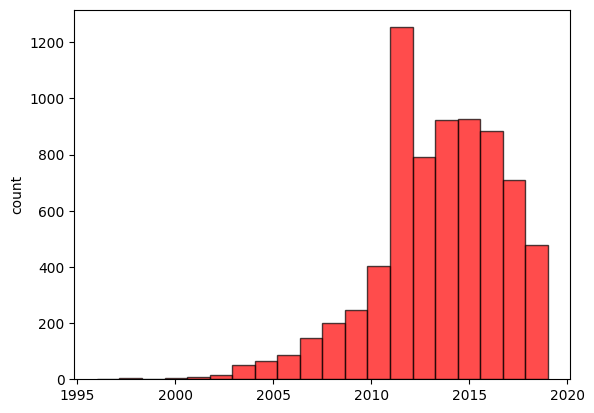

Kilometers_Driven


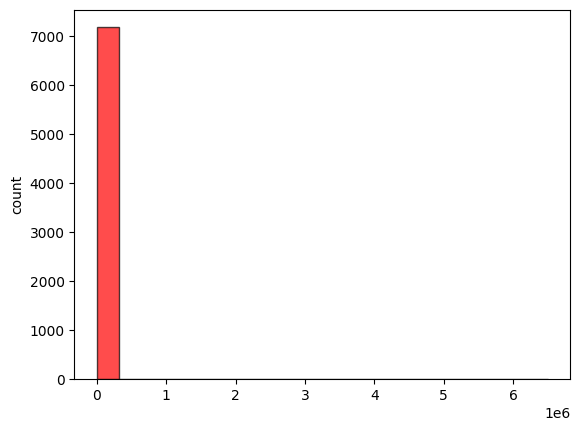

Seats


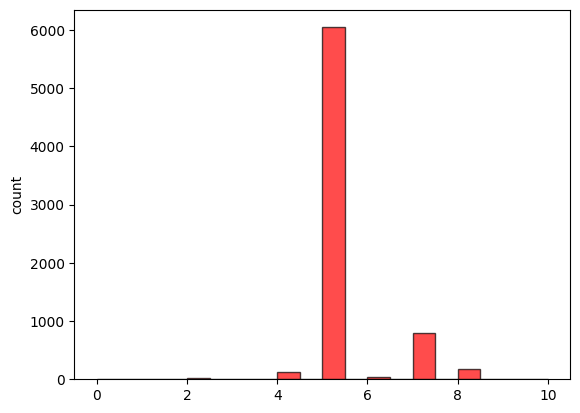

Price


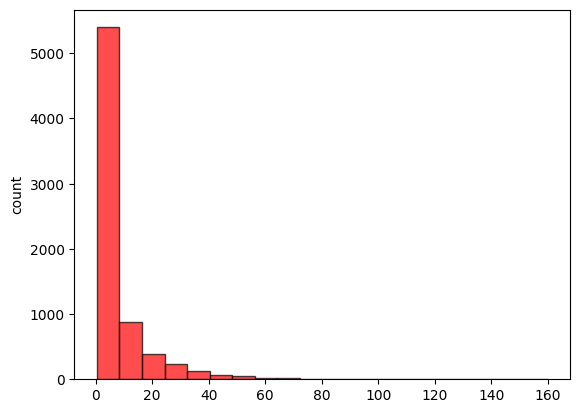

Power (Numeric)


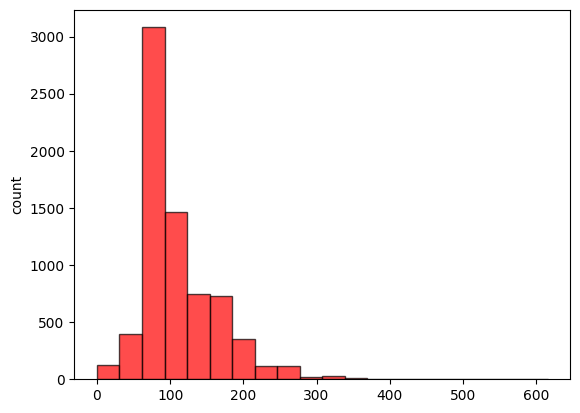

Engine (Numeric)


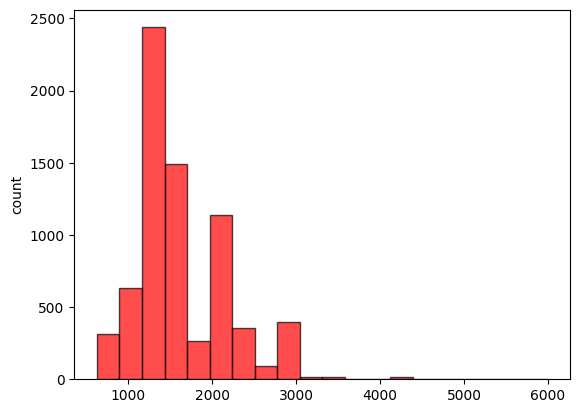

Mileage (Numeric)


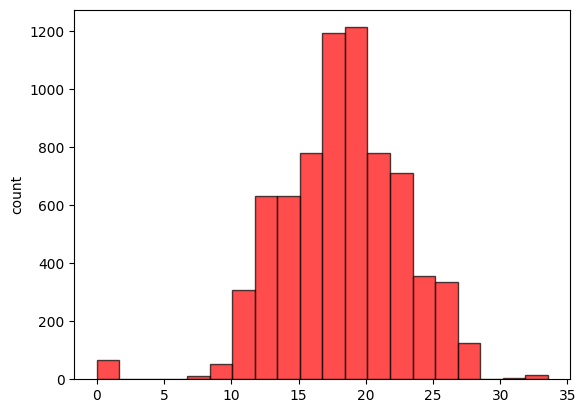

Car_Age


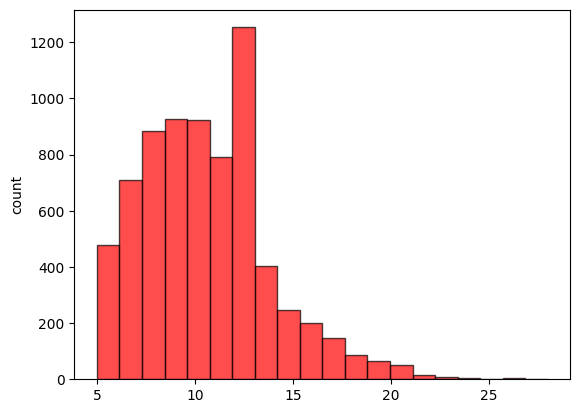

In [36]:
for col in num_cols:
    print(col)
    plt.subplot(1,1,1)
    df[col].hist(grid=False, bins=20, edgecolor='black', alpha=0.7, color='red')
    plt.ylabel('count')
    plt.show()

In [38]:
cat_col=['Location', 'Fuel_Type', 'Transmission','Owner_Type','Brand','Model']

Location


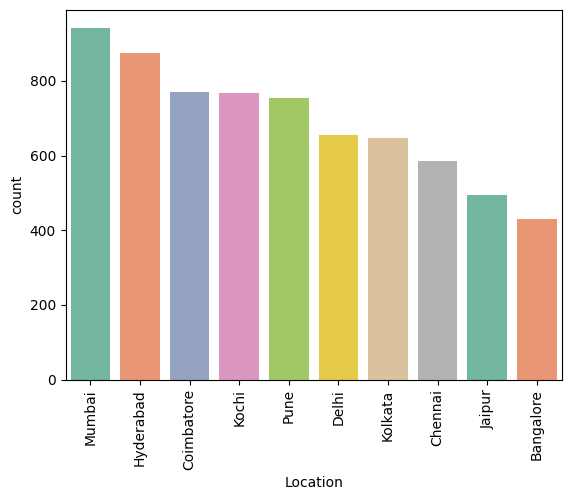

Fuel_Type


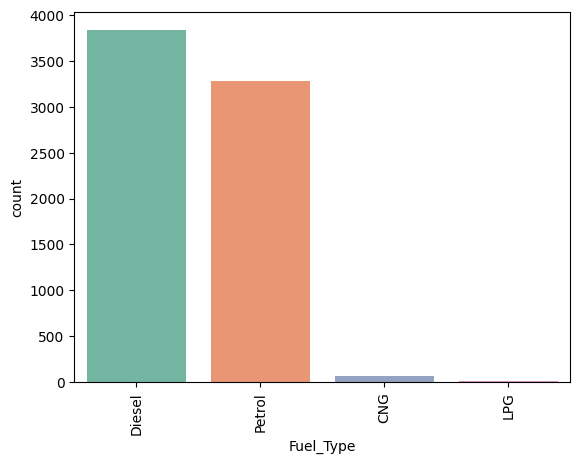

Transmission


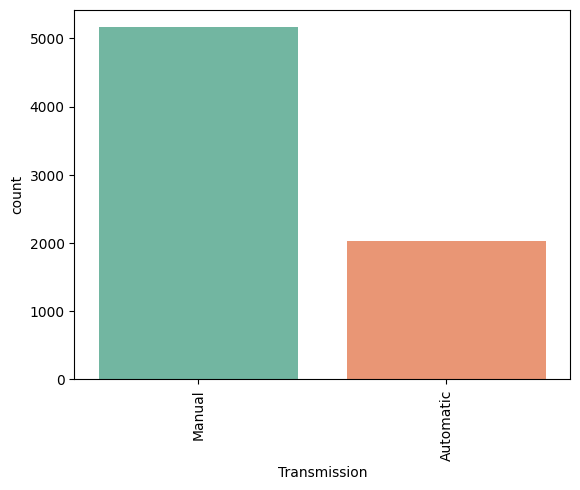

Owner_Type


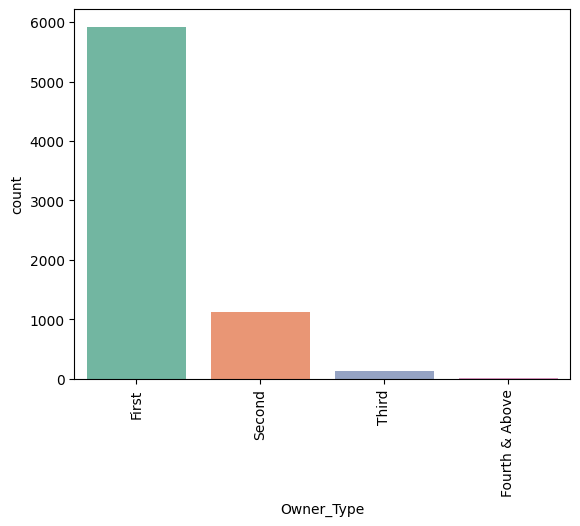

Brand


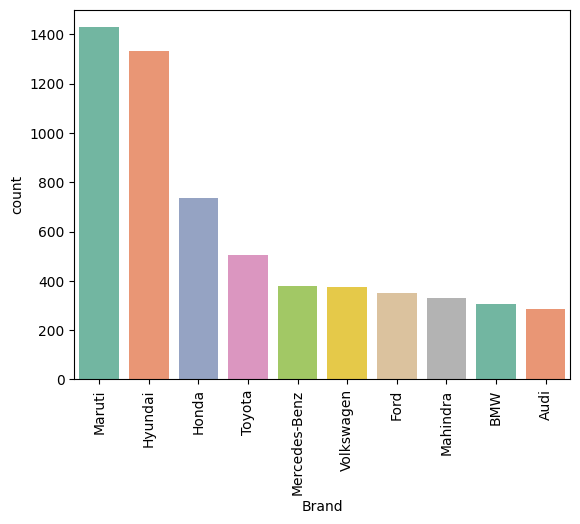

Model


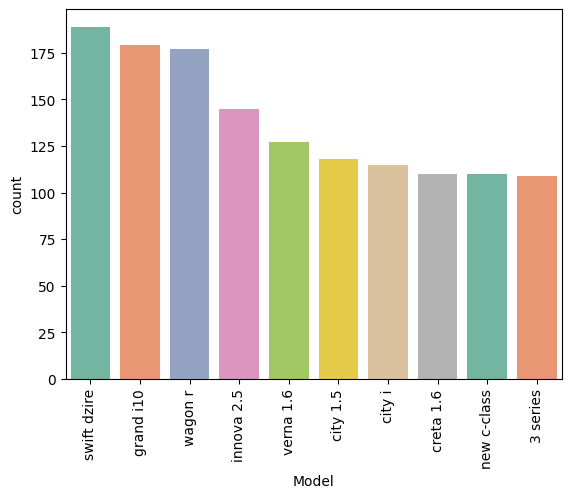

In [39]:
for col in cat_col:
    print(col)
    sns.countplot(x=col,data=df, order=df[col].value_counts().head(10).index, palette="Set2")
    plt.xticks(rotation=90)
    plt.show()

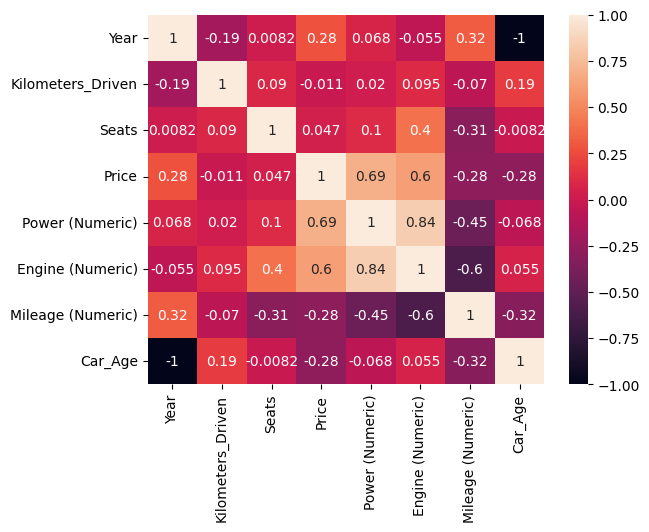

In [40]:
corr=df[num_cols].corr()
sns.heatmap(corr,annot=True)
plt.show()

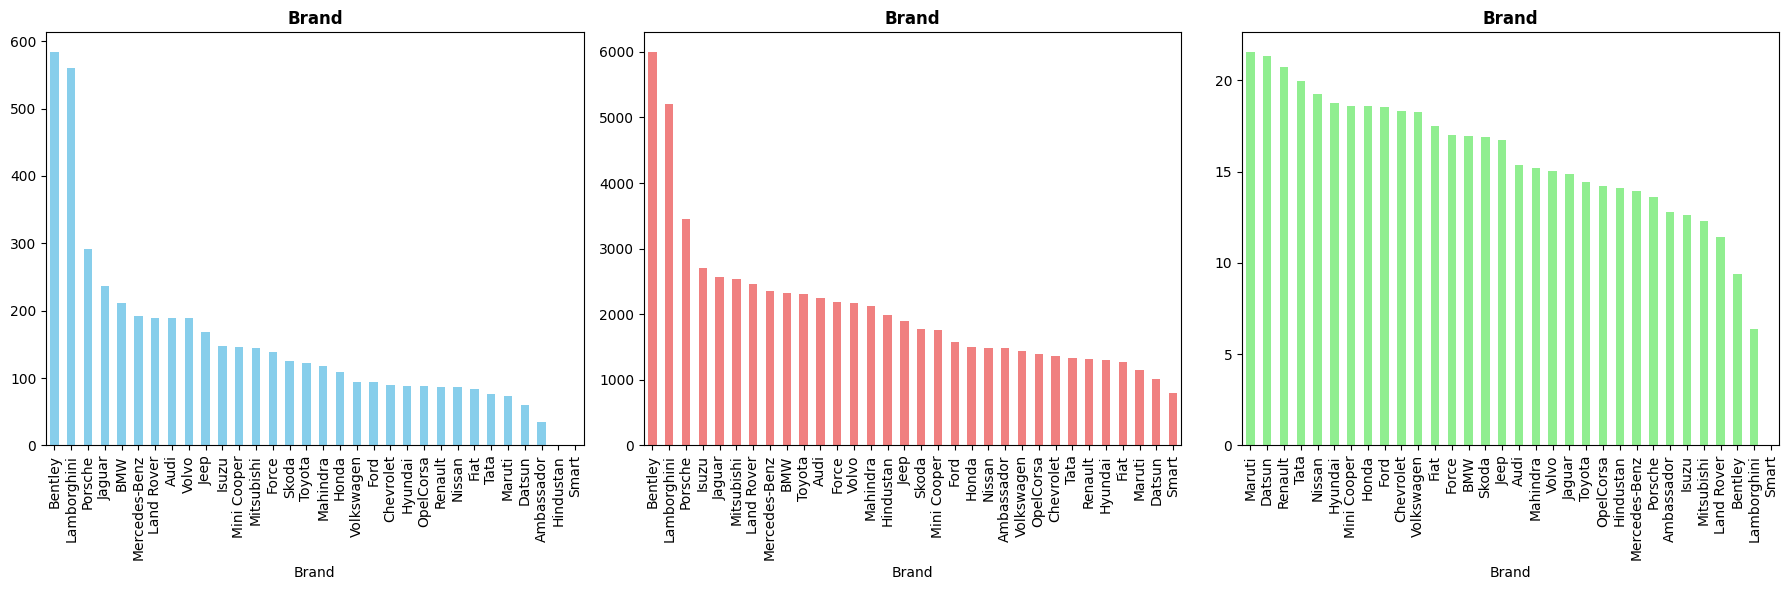

In [42]:
power=df.groupby('Brand')['Power (Numeric)'].mean().sort_values(ascending=False)
engine=df.groupby('Brand')['Engine (Numeric)'].mean().sort_values(ascending=False)
mileage=df.groupby('Brand')['Mileage (Numeric)'].mean().sort_values(ascending=False)

fig, ax=plt.subplots(1,3,figsize=(18,6))

power.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Highest Power by Brand', fontweight='bold')
ax[0].set_title('Power (Numeric)')
ax[0].set_title('Brand', fontweight='bold')

engine.plot(kind='bar', ax=ax[1], color='lightcoral')
ax[1].set_title('Highest Engine Capacity by Brand', fontweight='bold')
ax[1].set_title('Engine (Numeric)')
ax[1].set_title('Brand', fontweight='bold')

mileage.plot(kind='bar', ax=ax[2], color='lightgreen')
ax[2].set_title('Highest Mileage by Brand', fontweight='bold')
ax[2].set_title('Mileage (Numeric)')
ax[2].set_title('Brand', fontweight='bold')

plt.tight_layout()
plt.show()

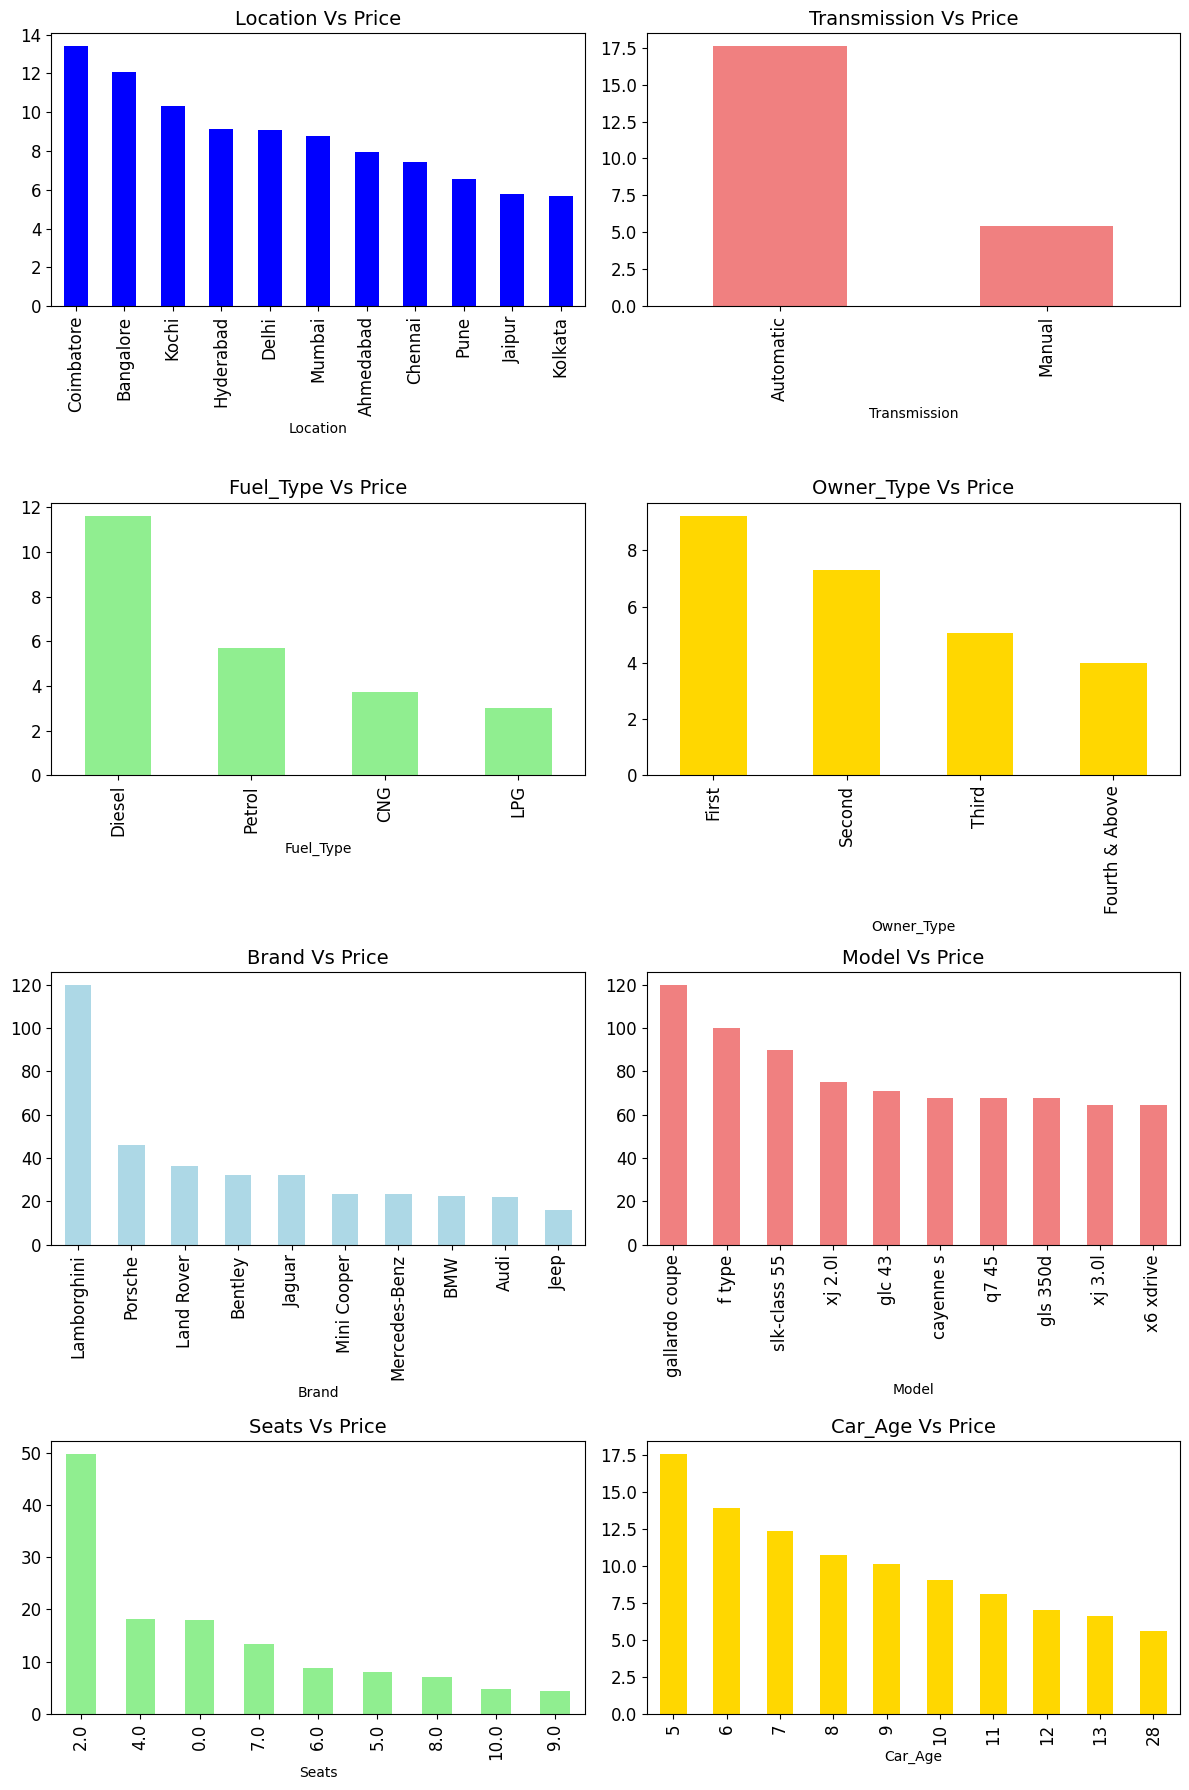

In [48]:
features= [
    ('Location','Location Vs Price', 'blue'),
    ('Transmission','Transmission Vs Price', 'lightcoral'),
    ('Fuel_Type','Fuel_Type Vs Price', 'lightgreen'),
    ('Owner_Type','Owner_Type Vs Price', 'gold'),
    ('Brand','Brand Vs Price', 'lightblue'),
    ('Model','Model Vs Price', 'lightcoral'),
    ('Seats','Seats Vs Price', 'lightgreen'),
    ('Car_Age','Car_Age Vs Price', 'gold')    
]

fig, axarr = plt.subplots(4,2, figsize=(12,18))

for i, (feature, title, color)in enumerate(features):
    row, col=divmod(i,2)
    if feature in ['Brand','Model', 'Car_Age']:
        df.groupby(feature)['Price'].mean().sort_values(ascending=False).head(10).plot.bar(
            ax=axarr[row][col], fontsize=12, color=color
        )
    else:
        df.groupby(feature)['Price'].mean().sort_values(ascending=False).plot.bar(
            ax=axarr[row][col], fontsize=12, color=color
        )
    axarr[row][col].set_title(title, fontsize=14) 
    
plt.tight_layout()
plt.show()              

conclusion:

car prices are influenced by where you buy them, whethere they're automatic or manual,the type of fuel they use, how many owners they've had, the brand and model, the number of seats, and how nw they are. knowing these trends can guide buyers in making smart choices based on thier prefeences and budget.